<a href="https://colab.research.google.com/github/vsky0/Mini_Project1/blob/main/Mini_Project_Revenue_Analysis_and_Visualization_of_Box_Office.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
# Importing libraries required
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
# used for data visualization and interpretation
import matplotlib.pyplot as plt

In [ ]:
#also used for data visualization but in a effective way and it provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

In [ ]:
#data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
from wordcloud import WordCloud

#Loading Dataset and Data Explorataion


In [ ]:
Data = pd.read_csv('RABO_dataset.csv',
                 delimiter=",",
                 engine="python",
                 error_bad_lines=False,
                 encoding='utf-8')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
Data.shape

(3000, 23)

In [ ]:
Data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
Data.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


In [ ]:
Data.shape

(3000, 23)

Information about dataset as follows...

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [ ]:
Data.describe(include = 'all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


Checking for null values in dataset

In [ ]:
Data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [ ]:
Data = Data.drop(['belongs_to_collection','crew', 'cast', 'Keywords',
                  'spoken_languages', 'production_companies', 'production_countries', 'tagline','homepage'], axis=1)

In [ ]:
Data['release_date'] = pd.to_datetime(Data['release_date'], infer_datetime_format=True)
Data['release_day'] = Data['release_date'].apply(lambda t: t.day)
Data['release_weekday'] = Data['release_date'].apply(lambda t: t.weekday())
Data['release_month'] = Data['release_date'].apply(lambda t: t.month)

Data['release_year'] = Data['release_date'].apply(lambda t: t.year if t.year < 2018 else t.year -100)

#***Analysis and Visualization***

#Revenue and Budget

*Disturbution of revenue*

Text(0, 0.5, 'No. of Films')

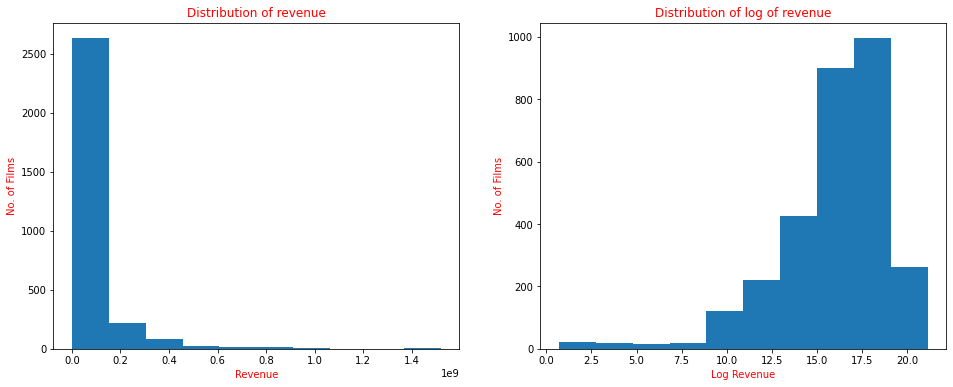

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(Data['revenue'])
plt.title('Distribution of revenue',color='red')
plt.xlabel('Revenue',color='red')
plt.ylabel('No. of Films',color='red')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(Data['revenue']))
plt.title('Distribution of log of revenue',color='red')
plt.xlabel('Log Revenue',color='red')
plt.ylabel('No. of Films',color='red')

In [ ]:
Data['log_revenue'] = np.log1p(Data['revenue'])

In [ ]:
Data[Data['revenue'] == Data['revenue'].max()]

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year,log_revenue
1126,1127,220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,89.887648,/cezWGskPY5x7GaglTTRN4Fugfb8.jpg,2012-04-25,143.0,Released,The Avengers,1519557910,25,2,4,2012,21.141685


In [ ]:
Data[Data['revenue'] == Data['revenue'].max()][['original_title','revenue','budget']]

,original_title,revenue,budget
1126,The Avengers,1519557910,220000000


*Top 5 highest revenue gained movies.*

In [ ]:
Data[['title', 'revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset=['revenue'], cmap='BuGn')

,title,revenue
1126,The Avengers,1519557910
1761,Furious 7,1506249360
2770,Avengers: Age of Ultron,1405403694
684,Beauty and the Beast,1262886337
2322,Transformers: Dark of the Moon,1123746996
906,The Dark Knight Rises,1084939099
2135,Pirates of the Caribbean: On Stranger Tides,1045713802
2562,Finding Dory,1028570889
881,Alice in Wonderland,1025491110
734,Zootopia,1023784195


*Budget Disturbution*

Text(0.5, 1.0, 'Distribution of log of budget')

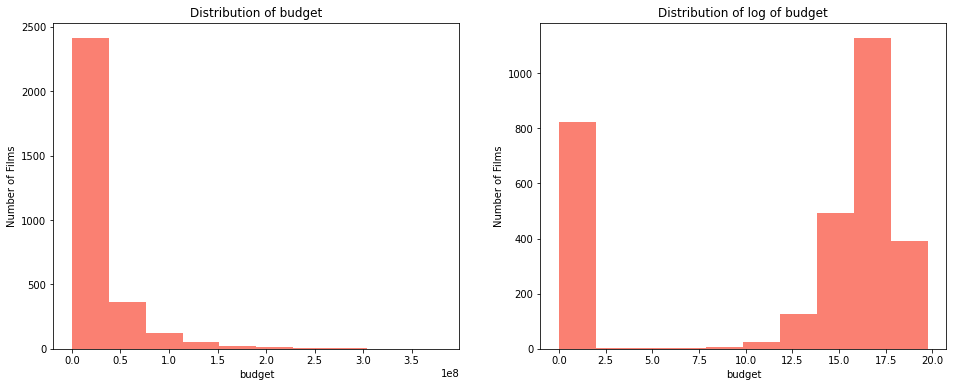

In [ ]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.xlabel("budget")
plt.hist(Data['budget'],color='salmon')
plt.title('Distribution of budget')
plt.ylabel('Number of Films')

plt.subplot(1, 2, 2)
plt.ylabel('Number of Films')
plt.xlabel("budget")
plt.hist(np.log1p(Data['budget']),color='salmon')
plt.title('Distribution of log of budget')

*Revenue v/s Budget and Log revenue v/s Log budget*

Text(0.5, 1.0, 'Revenue vs Budget')

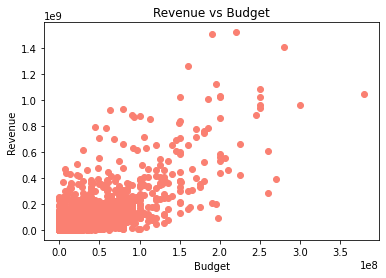

In [ ]:
plt.scatter(Data['budget'], Data['revenue'],color = 'salmon')
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title('Revenue vs Budget')


Text(0.5, 1.0, 'Log Revenue vs log Budget')

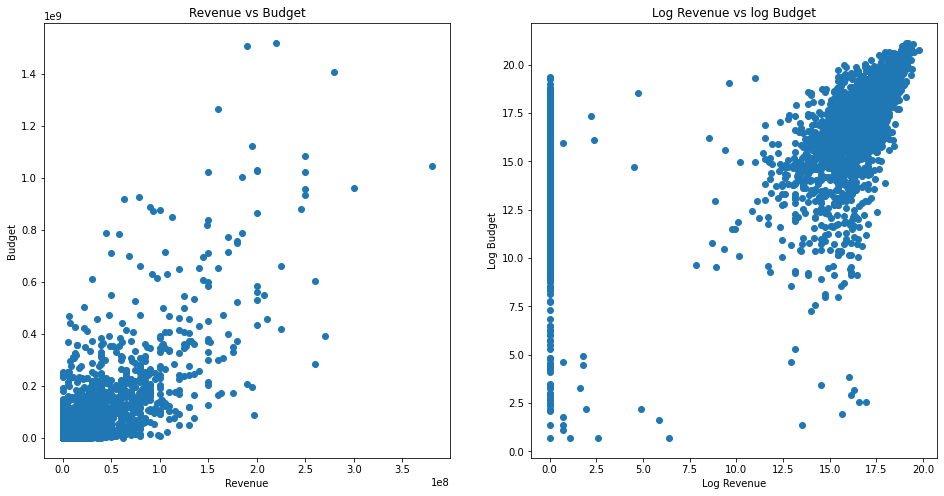

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(Data['budget'], Data['revenue'])
plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.title('Revenue vs Budget')

plt.subplot(1, 2, 2)
plt.xlabel("Log Revenue")
plt.ylabel("Log Budget")
plt.scatter(np.log1p(Data['budget']), Data['log_revenue'])
plt.title('Log Revenue vs log Budget')

*Movie with Highest Budget*

In [ ]:
Data[['title','budget','revenue']].sort_values(['budget'], ascending=False).head(10).style.background_gradient(subset=['budget','revenue'], cmap='mako')

,title,budget,revenue
2135,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,Pirates of the Caribbean: At World's End,300000000,961000000
2770,Avengers: Age of Ultron,280000000,1405403694
1425,Superman Returns,270000000,391081192
1270,John Carter,260000000,284139100
1630,Transformers: The Last Knight,260000000,604942143
2532,The Hobbit: An Unexpected Journey,250000000,1021103568
961,Harry Potter and the Half-Blood Prince,250000000,933959197
906,The Dark Knight Rises,250000000,1084939099
666,The Hobbit: The Desolation of Smaug,250000000,958400000


In [ ]:
Data[Data['budget'] == Data['budget'].max()]

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year,log_revenue
2135,2136,380000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",tt1298650,en,Pirates of the Caribbean: On Stranger Tides,Captain Jack Sparrow crosses paths with a woma...,27.88772,/wNUDAq5OUMOtxMlz64YaCp7gZma.jpg,2011-05-14,136.0,Released,Pirates of the Caribbean: On Stranger Tides,1045713802,14,5,5,2011,20.767966


In [ ]:
Data[Data['budget'] == Data['budget'].max()][['original_title','revenue','budget','release_date']]

,original_title,revenue,budget,release_date
2135,Pirates of the Caribbean: On Stranger Tides,1045713802,380000000,2011-05-14


In [ ]:
Data[['id','title','budget', 'revenue']].sort_values(['budget'], ascending=False).head(10).style.background_gradient(subset=['budget', 'revenue'])

,id,title,budget,revenue
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,2210,Pirates of the Caribbean: At World's End,300000000,961000000
2770,2771,Avengers: Age of Ultron,280000000,1405403694
1425,1426,Superman Returns,270000000,391081192
1270,1271,John Carter,260000000,284139100
1630,1631,Transformers: The Last Knight,260000000,604942143
2532,2533,The Hobbit: An Unexpected Journey,250000000,1021103568
961,962,Harry Potter and the Half-Blood Prince,250000000,933959197
906,907,The Dark Knight Rises,250000000,1084939099
666,667,The Hobbit: The Desolation of Smaug,250000000,958400000


#Runtime vs Revenue

*Movie with longest running time.*

In [ ]:
Data[Data['runtime'] == Data['runtime'].max()]

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year,log_revenue
1211,1212,18000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",tt1321865,en,Carlos,"The story of Venezuelan revolutionary, Ilich R...",4.558075,/obHJeOHn8J5XD049nj7KVSpAMEW.jpg,2010-05-19,338.0,Released,Carlos,871279,19,2,5,2010,13.677719


*Runtime Disturbution*

Text(0, 0.5, 'Number of Movies')

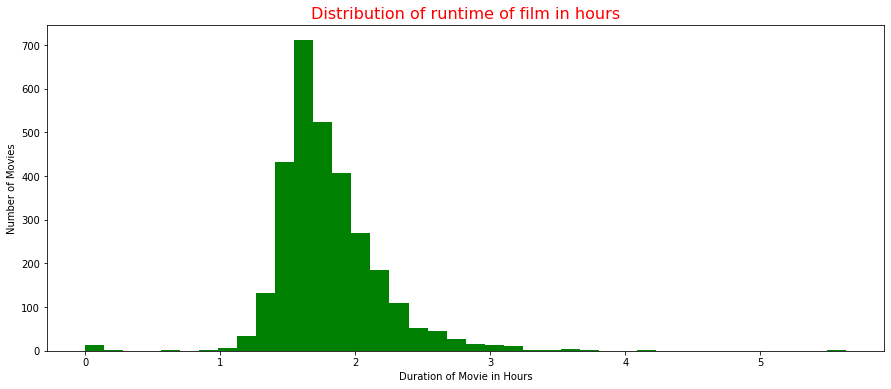

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(Data['runtime'].fillna(0) / 60, bins=40,color='green')
plt.title('Distribution of runtime of film in hours', fontsize=16, color='red')
plt.xlabel('Duration of Movie in Hours')
plt.ylabel('Number of Movies')

*Runtime with Revenue*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Runtime vs Revenue')

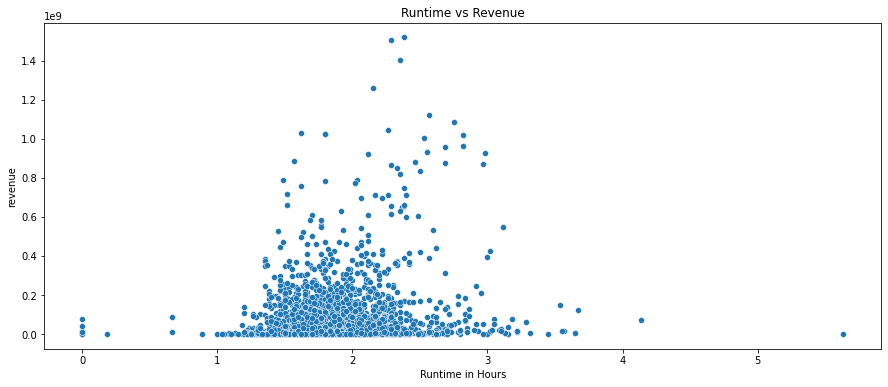

In [ ]:
plt.figure(figsize=(15,6))
plt.xlabel('Runtime in Hours')
sns.scatterplot(Data['runtime'].fillna(0)/60, Data['revenue'])
plt.title('Runtime vs Revenue')

*Revenue, Runtime with Budget*

In [ ]:
Data[['id','title','runtime', 'budget', 'revenue']].sort_values(['runtime'],ascending=False).head(10).style.background_gradient(subset=['runtime','budget','revenue'], cmap='OrRd')

,id,title,runtime,budget,revenue
1211,1212,Carlos,338.000000,18000000,871279
1922,1923,Cleopatra,248.000000,31115000,71000000
523,524,The Ten Commandments,220.000000,13000000,122700000
1302,1303,Heaven's Gate,219.000000,44000000,3484331
1914,1915,Gods and Generals,214.000000,56000000,12923936
2353,2354,Jodhaa Akbar,213.000000,8376800,13000000
625,626,Ben-Hur,212.000000,15000000,146900000
1975,1976,Chapiteau-Show,207.000000,2000000,393816
1731,1732,Hey Ram,199.000000,3900000,4900000
2120,2121,Spartacus,197.000000,12000000,60000000


#Number of Movies Released in a Year

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


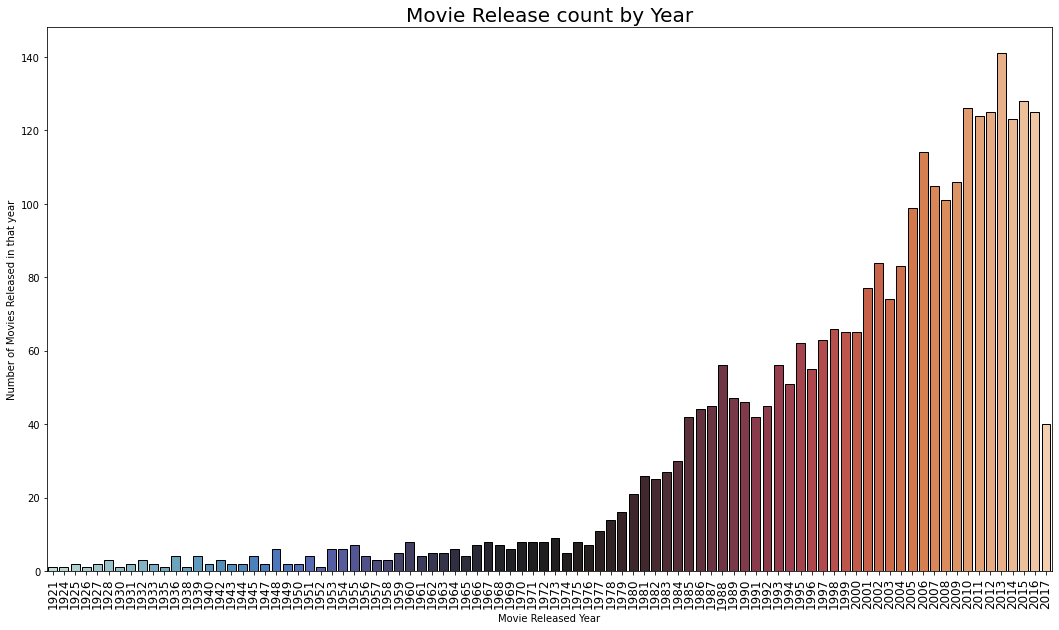

In [ ]:
plt.figure(figsize=(18,10))
edgecolor=(0,0,0),
sns.countplot(Data['release_year'].sort_values(), palette = "icefire", edgecolor=(0,0,0))
plt.title("Movie Release count by Year",fontsize=20)
plt.xlabel('Movie Released Year')
plt.ylabel('Number of Movies Released in that year')
plt.xticks(fontsize=12,rotation=90)
plt.show()

#Top 5 years With The Highest Number Of Movies Released

In [ ]:
df1 = pd.DataFrame(Data['release_year'].value_counts().head())

In [ ]:
df1

,release_year
2013,141
2015,128
2010,126
2012,125
2016,125


#Number Of Movie Releases In Each Month

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


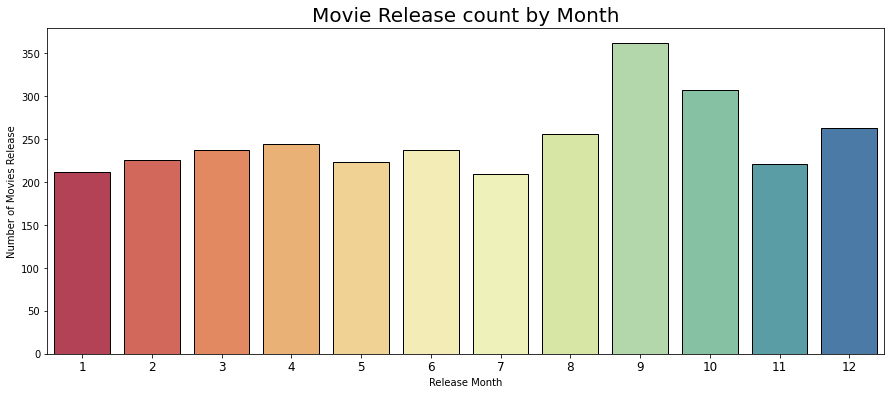

In [ ]:
plt.figure(figsize=(15,6))
edgecolor=(0,0,0),
sns.countplot(Data['release_month'].sort_values(), palette = "Spectral", edgecolor=(0,0,0))
plt.title("Movie Release count by Month",fontsize=20)
plt.xlabel('Release Month')
plt.ylabel('Number of Movies Release')
plt.xticks(fontsize=12)
plt.show()

#Movies With Highest And Lowest Popularity

*High Popularity film.*

In [ ]:
Data[Data['popularity'] == Data['popularity'].max()]

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,runtime,status,title,revenue,release_day,release_weekday,release_month,release_year,log_revenue
518,519,149000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0451279,en,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,/imekS7f1OuHyUP2LAiTEM0zBzUz.jpg,2017-05-30,141.0,Released,Wonder Woman,820580447,30,1,5,2017,20.525523


In [ ]:
Data[Data['popularity'] == Data['popularity'].max()][['original_title','revenue','popularity']]

,original_title,revenue,popularity
518,Wonder Woman,820580447,294.337037


*Top ten popular films and their revenue.*

In [ ]:
Data[['title','popularity', 'revenue']].sort_values(['popularity'], ascending=False).head(10).style.background_gradient(subset=['popularity', 'revenue'], cmap='YlOrRd')

,title,popularity,revenue
518,Wonder Woman,294.337037,820580447
684,Beauty and the Beast,287.253654,1262886337
1695,Baby Driver,228.032744,224511319
2326,Deadpool,187.860492,783112979
2126,Guardians of the Galaxy Vol. 2,185.330992,863416141
1309,Gone Girl,154.801009,369330363
1715,War for the Planet of the Apes,146.161786,369907963
1673,The Dark Knight,123.167259,1004558444
1126,The Avengers,89.887648,1519557910
2293,The Circle,88.439243,20497844


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


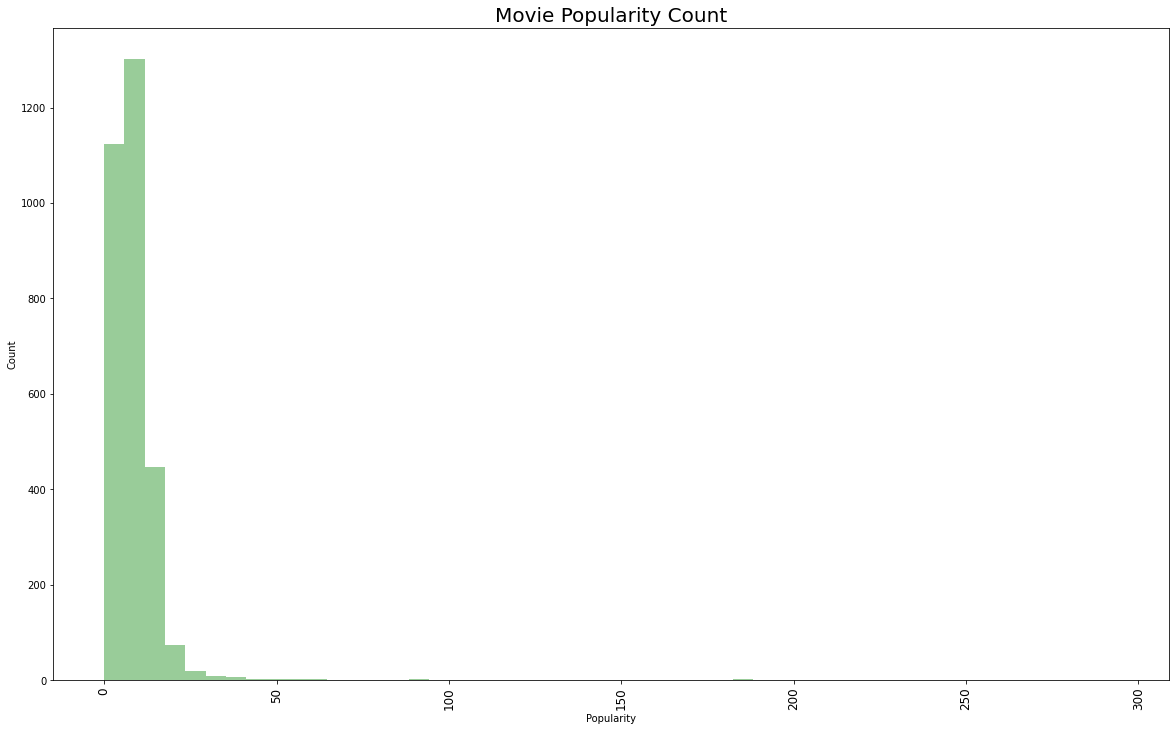

In [ ]:
plt.figure(figsize=(20,12))
edgecolor=(0,0,0)

sns.distplot(Data['popularity'], kde=False,color = 'green')

plt.title("Movie Popularity Count",fontsize=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.xticks(fontsize=12,rotation=90)

plt.show()

#On Which Day Most Of The Films Released ? Is it Thursday or Friday ?

*Number of movies released vs weekday*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


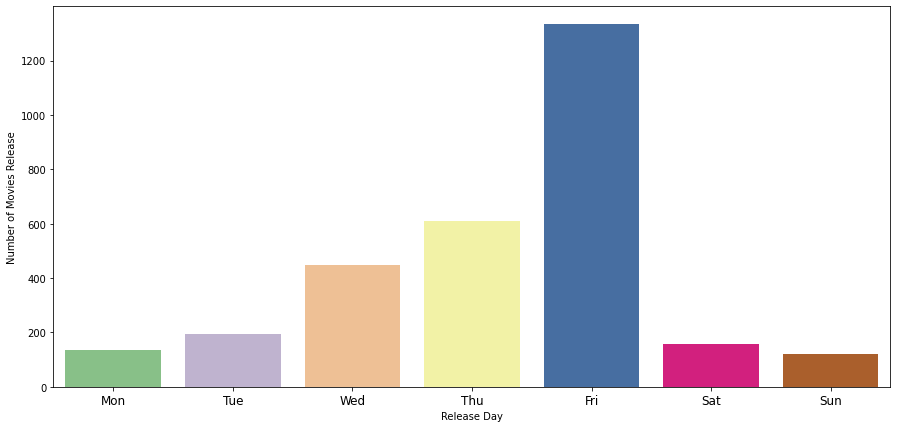

In [ ]:
plt.figure(figsize=(15,7))

sns.countplot(Data['release_weekday'].sort_values(), palette='Accent')

loc = np.array(range(len(Data['release_weekday'].unique())))
days_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.xlabel('Release Day')
plt.ylabel('Number of Movies Release')
plt.xticks(loc, days_label, fontsize=12)
plt.show()

*Most of the movies are released on friday, so that people can watch and give review about them if it's good then people will watch on saturday and sunday as weekends.*

*Revenue vs day of release*

Text(0.5, 1.0, '   Revenue on different days of week of release')

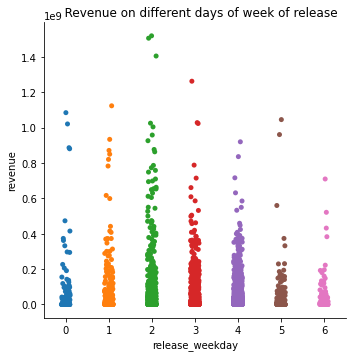

In [ ]:
sns.catplot(x='release_weekday', y='revenue',data=Data)
plt.title('   Revenue on different days of week of release')

#Top Words Used In Titles And Overview

*From Titles*

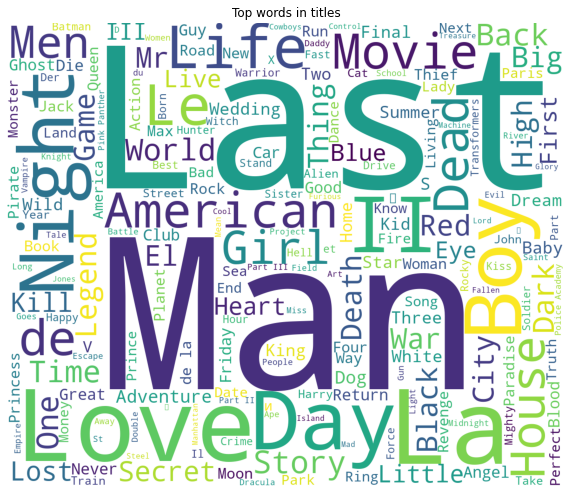

In [ ]:
plt.figure(figsize = (10, 10))
text = ' '.join(Data['original_title'].values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in titles')
plt.axis("off")
plt.show()

*From Overview*

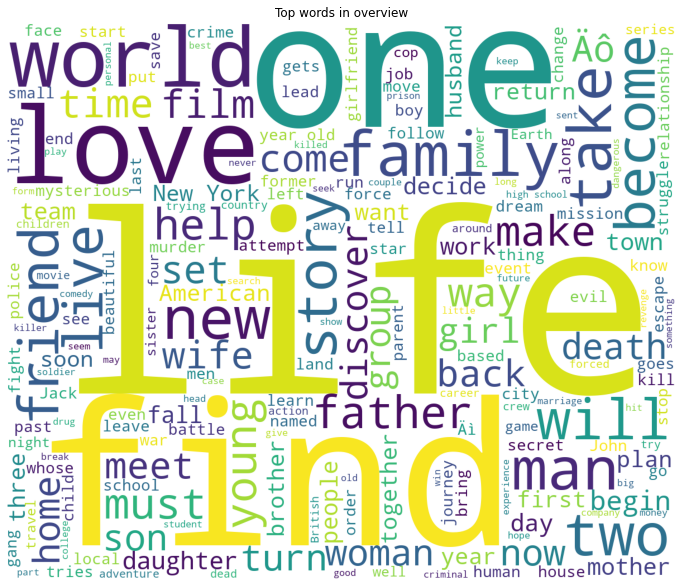

In [ ]:
plt.figure(figsize = (12, 12))
text = ' '.join(Data['overview'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='white', width=1200, height=1000).generate(text)
plt.imshow(wordcloud)
plt.title('Top words in overview')
plt.axis("off")
plt.show()

#Top Revenue Grossing Languages

<BarContainer object of 3000 artists>

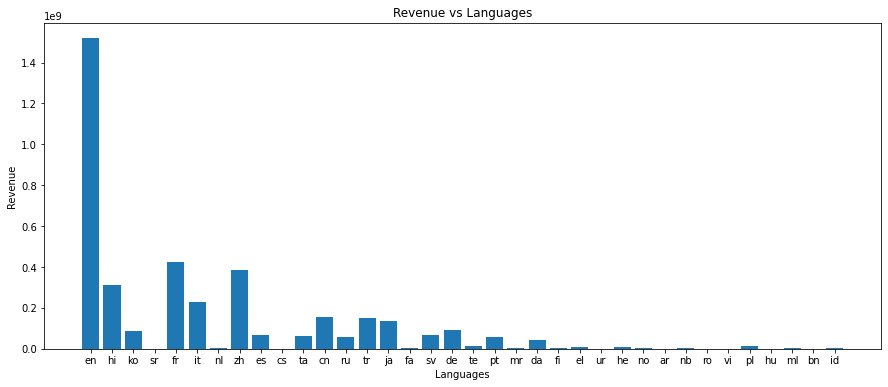

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Revenue vs Languages')
plt.xlabel('Languages')
plt.ylabel('Revenue')
plt.bar(Data['original_language'],Data['revenue'])

#Number of Movies Released In Respective Languages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


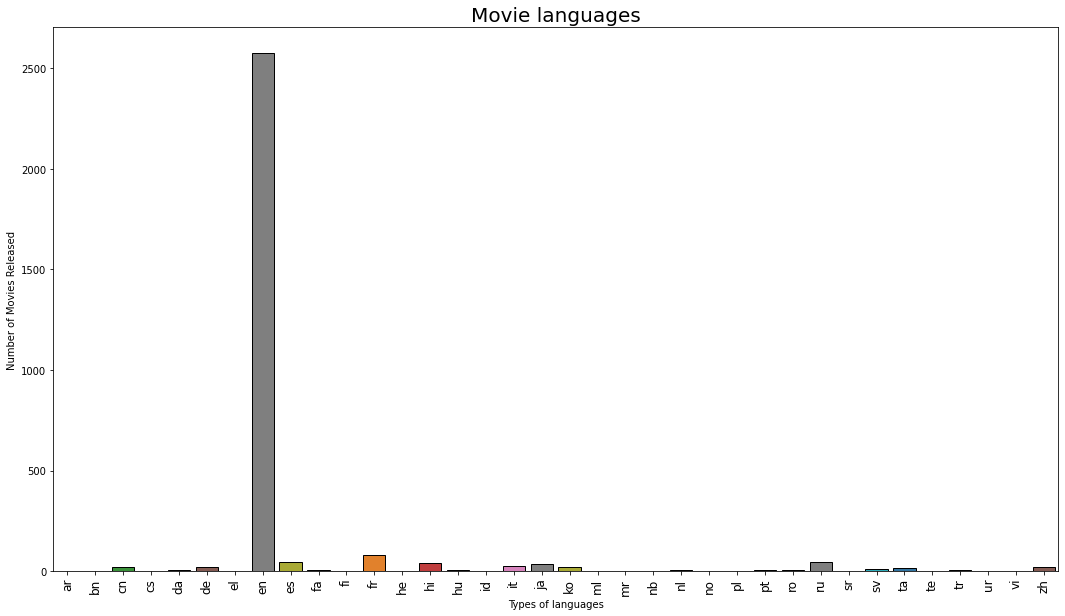

In [ ]:
plt.figure(figsize=(18,10))
edgecolor=(0,0,0),
sns.countplot(Data['original_language'].sort_values(), palette = "tab10", edgecolor=(0,0,0))
plt.title("Movie languages",fontsize=20)
plt.xlabel('Types of languages')
plt.ylabel('Number of Movies Released')
plt.xticks(fontsize=12,rotation=90)
plt.show()



*  List of Languages :
*English - en
*Hindi - hn
*French - fr
*Spanish - es
*Korean - ko
*Serbian - sr
*Italian - it
*Dutch - nl
*Chinese - zh
*Czech - cs
*Tamil - ta
*Russian - ru
*Turkish - tr
*Japanese - ja
*Swedish - sv
*German - de
*Telugu - te
*Portugeuse - pt
*Marathi - mr
*Dannish - da
*Finnish - fi
*Greek - el
*Urdu - ur
*Hebrew - he
*Norwegian - no
*Arabic - ar
*Romanian - ro
*Vitnamese - vi
*Polish - pl
*Malayalam - ml
*Hungarian - hu
*Bengali - bn
*Indonesian - id



#Runtime and Languages

<BarContainer object of 3000 artists>

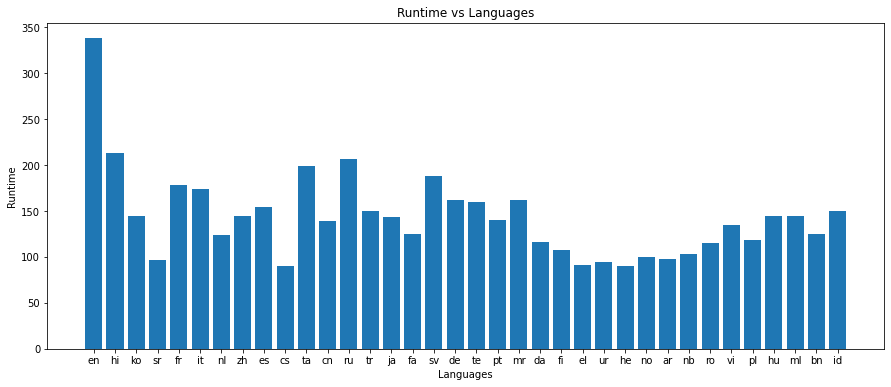

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Runtime vs Languages')
plt.xlabel('Languages')
plt.ylabel('Runtime')
plt.bar(Data['original_language'],Data['runtime'])

# Film Description

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [ ]:
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
! pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 5.2 MB/s 
     |████████████████████████████████| 133 kB 40.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=e187a466fab578b904c81a9bad3e0d51afe9561fb2b92cca213d81af41a694d9
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompa

In [ ]:
import eli5


vectorizer = TfidfVectorizer(
            sublinear_tf=True,
            analyzer='word',
            token_pattern=r'\w{1,}',
            ngram_range=(1, 2),
            min_df=5)

overview_text = vectorizer.fit_transform(Data['overview'].fillna(''))
linreg = LinearRegression()
linreg.fit(overview_text, Data['log_revenue'])
eli5.show_weights(linreg, vec=vectorizer, top=20, feature_filter=lambda x: x != '')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print('Target value:', Data['log_revenue'][2])
eli5.show_prediction(linreg, doc=Data['overview'].values[500], vec=vectorizer)

Target value: 16.38751199098573


#Revenue Prediction

In [ ]:
y = Data['revenue']
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import r2_score

In [ ]:
Data.runtime = Data.runtime.fillna(method = "ffill")
x = Data[['popularity', 'runtime', 'budget']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)

*Linear Regression*

In [ ]:
def rmsle(y,y0): return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
model = reg.fit(X_train,y_train)
y_pred = reg.predict(X_train)
rmsle = rmsle(y_pred, y_train)
print('Accuracy :',r2_score(y_train,y_pred))
print('rmsle : ',rmsle)

Accuracy : 0.6307380934133991
rmsle :  2.145105494751437


<ipython-input-49-43415d4c0104>:1: RuntimeWarning: invalid value encountered in log1p
  def rmsle(y,y0): return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))


In [ ]:
# print("The linear model has intercept : {} \nThe Coefficients : {} \nThe RMSLE : {} ".format(model.intercept_, model.coef_, rmsle) )


*RandomForestRegressor*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg2 = RandomForestRegressor(max_depth=7)
reg2.fit(X_train,y_train)
y_pred = reg2.predict(X_train)
print('Accuracy :',r2_score(y_train,y_pred))


Accuracy : 0.8515096878943053
